In [7]:
%%markdown
A función escollida é:

f(x)=tanh(x)=(e^x−e^−x)/(e^x+e^-x)

Esta función representa a ecuacón da tanxente hiperbólica. Preténdese buscar unha raíz da función, é dicir un punto no que f(x)=0. O intervalo escollido para atopar a raíz é o [-2,2]. 

A función da tanh aparece en diversos campos da física e da enxeñaría nos que destacan problemas de modelización de sistemas con transicións suaves entre dous estados, como en circuitos electrónicos. Resolver a ecuación tanh(x)=0 é fundamental para determinar os puntos de equilibrio nestes sistemas.


A función escollida é:

f(x)=tanh(x)=(e^x−e^−x)/(e^x+e^-x)

Esta función representa a ecuacón da tanxente hiperbólica. Preténdese buscar unha raíz da función, é dicir un punto no que f(x)=0. O intervalo escollido para atopar a raíz é o [-2,2]. 

A función da tanh aparece en diversos campos da física e da enxeñaría nos que destacan problemas de modelización de sistemas con transicións suaves entre dous estados, como en circuitos electrónicos. Resolver a ecuación tanh(x)=0 é fundamental para determinar os puntos de equilibrio nestes sistemas.


In [6]:
%%markdown 
Antón Pena Blanco

Antón Pena Blanco


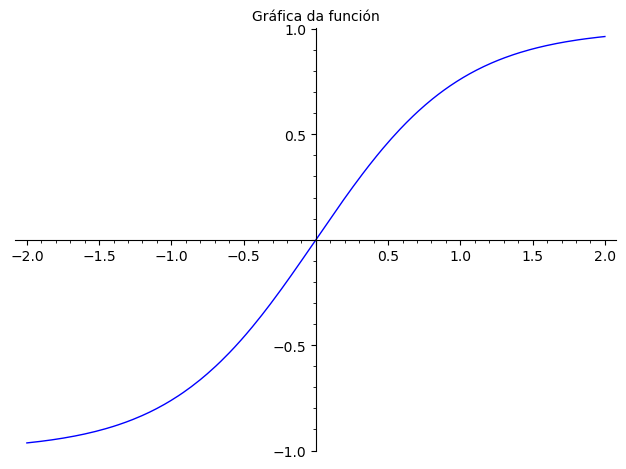

In [11]:
f(x) = (e^x-e^-x)/(e^x+e^-x)
a=-2
b=2
plot(f,a,b,title='Gráfica da función')

In [15]:
def dicotomia(f, a, b, xtol=1e-12, rtol=1e-14):
    """DICOTOMIA    Calculo de raices por dicotomia."""
    r = a
    k = 0
    v = []
    I = []
    # comprobacions previas
    if abs(f(a)).n() < rtol:
        r = a.n(); return r,k,v,I
    elif abs(f(b)).n() < rtol:
        r = b.n(); return r,k,v,I
    elif (f(a)*f(b)).n() > 0:
        raise RuntimeError('Extremos de igual signo.')
    # calculo iterativo
    while abs(b - a) > xtol:
        r = (a + b).n() / 2
        k = k + 1
        v.append(r)
        I.append((a,b))
        if abs(f(r)).n() < rtol:
            return r,k,v,I
        elif (f(a)*f(r)).n() < 0:
            b = r
        else:
            a = r
    return r,k,v,I

In [19]:
dicotomia(f, a, b)[0:2]

(0.000000000000000, 1)

In [20]:
def debuxa_dicotomia(f, a, b, v, I):
    """DEBUXA_DICOTOMIA    Visua
    liza intervalos de dicotomía."""
    p = plot(f, a, b) + point(zip(v,[0]*len(v)), color='green')
    h = (p.ymax() - p.ymin())/(1.5*len(v))
    show(sum(line([(a,h*i),    (b,h*i)],     color='green') + \
             line([(a,h*i-h/4),(a,h*i+h/4)], color='green') + \
             line([(b,h*i-h/4),(b,h*i+h/4)], color='green')   \
             for i, (a,b) in enumerate(I)) + p, xmin=a, xmax=b)

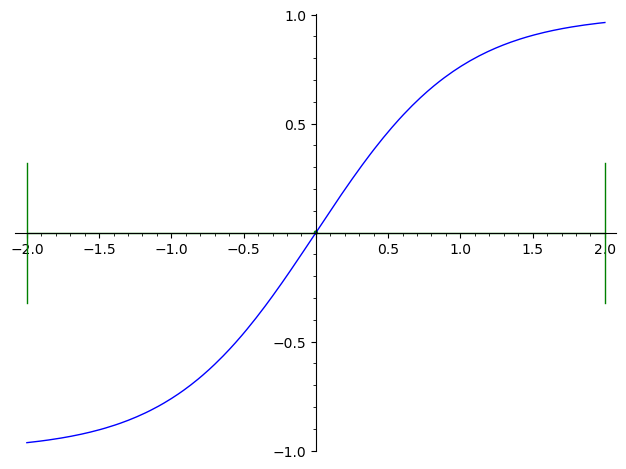

In [21]:
 _,_,v,I = dicotomia(f, a, b)
debuxa_dicotomia(f, a, b, v, I)

In [22]:
kmax = lambda a, b, xtol: ceil(log( (b-a)/xtol, 2))
kmax(a, b, 1e-12)

42

In [24]:
%%markdown
O número de iteracións é 1 mentres que o número máximo é 42 polo que é correcto

O número de iteracións é 1 mentres que o número máximo é 42 polo que é correcto


In [25]:
def newton(f, df, x0, xtol=1e-12, rtol=1e-14, M=100, errorM=True):
    """NEWTON    Calculo de raices por Newton."""
    v = [x0.n()]
    for k in range(M):
        dfx = df(v[k]).n()
        if abs(dfx) < rtol:
            raise RuntimeError('Derivada nula.')
        r = (v[k] - f(v[k]) / dfx).n()
        v.append(r)
        # test de parada
        if abs(r-v[k]) < xtol or abs(f(r)).n() < rtol:
            return r, len(v), v
    if errorM: raise RuntimeError('Excedido numero maximo de iteracions.')
    return r, len(v), v

In [29]:
newton(f, diff(f), 1)

(-5.47522097105180e-18,
 7,
 [1.00000000000000,
  -0.813430203923509,
  0.409402316583386,
  -0.0473049164556158,
  0.0000706028036445636,
  -2.34706622626729e-13,
  -5.47522097105180e-18])

In [30]:
def debuxa_newton(f, a, b, v):
    """DEBUXA_NEWTON    Visualiza tanxentes do metodo de Newton."""
    show(plot(f, a, b) + point(zip(v,[0]*len(v)), color='green') + \
    sum(line([(v[i],0),(v[i],f(v[i]))], color='green', linestyle='--') for i in range(len(v))) + \
    sum(line([(v[i-1],f(v[i-1])), (v[i],0)], color='green') for i in range(1,len(v))), xmin=a, xmax=b)

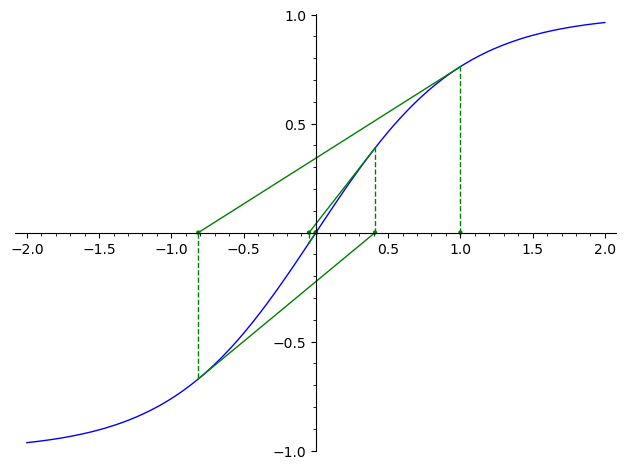

In [31]:
_,_,v = newton(f, diff(f), 1)
debuxa_newton(f, a, b, v)

In [32]:
def coef_newton(f, a, b, v):
    """COEF_NEWTON    Calcula os coeficientes de converxencia de Newton."""
    alpha = find_root(f, a, b, xtol=9.e-16, rtol=9.e-16) #aproximamos "ao máximo" a raíz
    pts = []
    for k in range(len(v)-1):
        if (alpha - v[k])^2 > RDF.epsilon():
            pts.append( (k, abs(alpha - v[k+1]) / (alpha - v[k])^2 ) )
    return line(pts, marker = '.', title='$C_k$ obtidos')

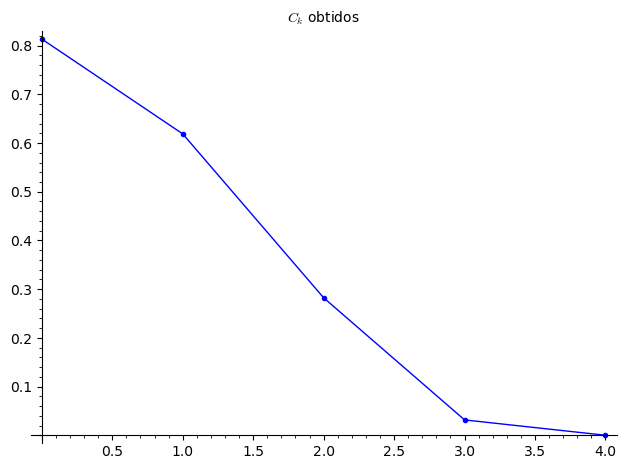

In [33]:
coef_newton(f, a, b, v)

In [0]:
Xa que os coeficientes converxen asintóticamente a medida que aumenta k, podemos confirmar que ten converxencia cuadrática.
